In [1]:
# Computer vision libraries in Pytorch

# torchvision
# torchvision.datasets - get datasets and data loading funtions
# torchvision.problems - pretrained models
# torchvision.transforms - functions to manipulate your vision data
# torch.utils.data.Dataset - Base dataset class in Pytorch
# torch.utils.data.DataLoader - Creates a python iterable over a dataset

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


In [5]:
# Getting a dataset - FashionMNIST

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download
    train=True, # is it the training dataset?
    download=True, # do you want to download?
    transform=ToTensor(), # how to transform the data?
    target_transform=None # how do we want to transform the targets/labels?
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [9]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [13]:
print(f"Image shape: {image.shape} -> # color channels, height, width | Label: {label}")

Image shape: torch.Size([1, 28, 28]) -> # color channels, height, width | Label: 9


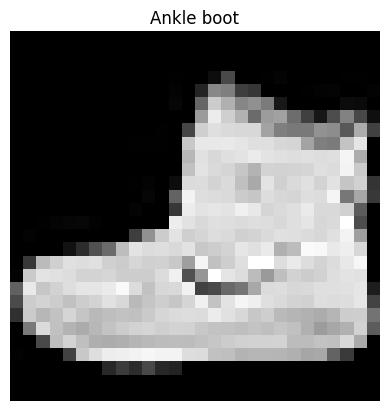

In [18]:
# Visualizing our data
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()

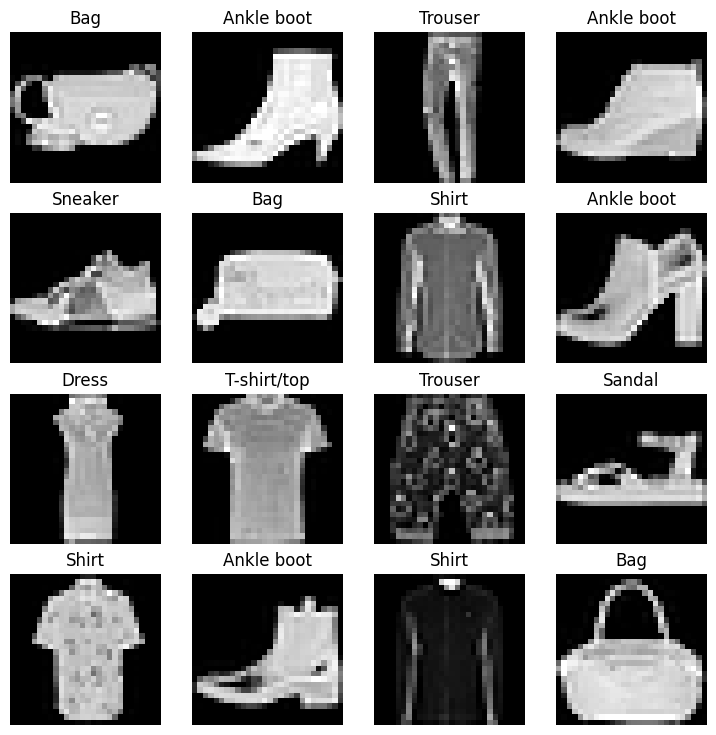

In [20]:
torch.manual_seed(8)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
plt.show()

In [21]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [22]:
# DataLoader turns our dataset into a Python iterable
# Turn the data into batches
# Why? It is more efficient - your computer may not be able to look at 60000 images in one hit so we break it down
# It gives our NN to update its gradients per epoch

In [23]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cb43f30fa30>,
 <torch.utils.data.dataloader.DataLoader at 0x7cb43f30ee00>)

In [26]:
print(f"Dataloader: {train_dataloader}\nLength: {len(train_dataloader)} of batch size {BATCH_SIZE}\nLength: {len(test_dataloader)} of batch size {BATCH_SIZE}\nType: {type(train_dataloader)}")

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7cb43f30fa30>
Length: 1875 of batch size 32
Length: 313 of batch size 32
Type: <class 'torch.utils.data.dataloader.DataLoader'>


In [27]:
# What is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

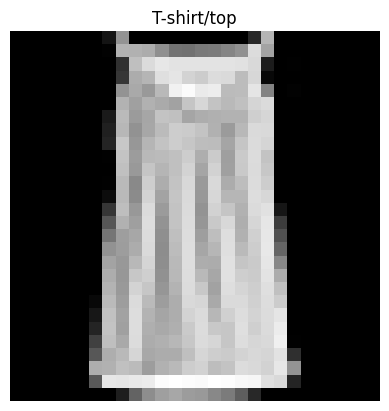

In [28]:
torch.manual_seed(8)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

In [30]:
# Build a baseline
# When starting to build a series of machine learning modelling experiments its best practice to start with a baseline model.
# Start simply and add complexity if necessary

In [37]:
flatten_layer = nn.Flatten()

# Get a single sample

x = train_features_batch[0]
x = flatten_layer(x)
print(x.shape)

torch.Size([1, 784])


In [38]:
class FashionMnistV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,
                out_features=hidden_units),
      nn.Linear(in_features=hidden_units,
                out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [39]:
torch.manual_seed(8)
model_0 = FashionMnistV0(input_shape=784, # this is 28*28
                         hidden_units=10, # how many units in the hidden layer
                         output_shape=len(class_names) # one for every class
                         ).to("cpu")

model_0

FashionMnistV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [42]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.1688,  0.3662,  0.2625, -0.2519,  0.0869,  0.1734,  0.0407, -0.2320,
         -0.1461,  0.1613]], grad_fn=<AddmmBackward0>)

In [43]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0070,  0.0247,  0.0319,  ..., -0.0215, -0.0278, -0.0346],
                      [-0.0242,  0.0098,  0.0205,  ...,  0.0143, -0.0107,  0.0335],
                      [ 0.0207, -0.0158,  0.0026,  ...,  0.0012,  0.0147, -0.0173],
                      ...,
                      [-0.0331,  0.0016, -0.0218,  ...,  0.0343,  0.0337, -0.0182],
                      [ 0.0152,  0.0174, -0.0146,  ...,  0.0155,  0.0211, -0.0336],
                      [-0.0049, -0.0267,  0.0193,  ...,  0.0250,  0.0071,  0.0051]])),
             ('layer_stack.1.bias',
              tensor([-0.0252,  0.0159,  0.0255,  0.0168,  0.0215, -0.0044,  0.0251, -0.0059,
                      -0.0185, -0.0072])),
             ('layer_stack.2.weight',
              tensor([[ 0.0285, -0.0929, -0.0582, -0.0517,  0.0831,  0.1025,  0.1071,  0.0560,
                        0.2898,  0.0570],
                      [ 0.0639, -0.2657,  0.2207,  0.2873,  0.0826, -0.0813,  0.

In [44]:
# Setup loss, optimizer and evaluation metrics
# loss_fn = nn.CrossEntripyLoss()
# Optimizer - torch.optim.SGD()
# Evaluation metric - accuracy as our eval metric

In [45]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [46]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [47]:
# Creating a function to time our experiments
# ML - very experimental
# You want to track model's performance (loss and acc values)
# How fast it runs

In [48]:
from timeit import default_timer as timer

def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return

In [50]:
start = timer()
# code
end = timer()
print_train_time(start, end, device = "cpu")

Train time on cpu: 0.000 seconds
